In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#!pip install geopy

! pip install geocoder

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 98 kB 9.6 MB/s  eta 0:00:01
     |████████████████████████████████| 93 kB 4.6 MB/s  eta 0:00:01
Libraries imported.


In [3]:
!wget -q -O 'sf_data.json' https://gist.github.com/cdolek/d08cac2fa3f6338d84ea/raw/ebe3d2a4eda405775a860d251974e1f08cbe4f48/SanFrancisco.Neighborhoods.json
print("Data retrieved!")

Data retrieved!


In [4]:
with open('sf_data.json') as json_data:
    sf_data = json.load(json_data)

In [5]:
sf_data

{'type': 'FeatureCollection',
 'features': [{'geometry': {'geometries': [{'type': 'Polygon',
      'coordinates': [[[-122.391701, 37.794113],
        [-122.39198, 37.793906],
        [-122.391614, 37.793571],
        [-122.391714, 37.793459],
        [-122.388816, 37.791005],
        [-122.388932, 37.790919],
        [-122.388616, 37.790348],
        [-122.388076, 37.790518],
        [-122.388375, 37.790334],
        [-122.388225, 37.790032],
        [-122.385852, 37.790951],
        [-122.385496, 37.790559],
        [-122.387589, 37.789838],
        [-122.387289, 37.789347],
        [-122.385303, 37.789838],
        [-122.38512, 37.789313],
        [-122.387174, 37.788807],
        [-122.387032, 37.788255],
        [-122.385261, 37.788537],
        [-122.385136, 37.788156],
        [-122.38739, 37.787736],
        [-122.387415, 37.787269],
        [-122.3845, 37.787437],
        [-122.384342, 37.785728],
        [-122.387577, 37.785485],
        [-122.38765, 37.784929],
        [-122.

In [6]:
neighborhoods_data = sf_data['features']

In [7]:
neighborhoods_data[0]

{'geometry': {'geometries': [{'type': 'Polygon',
    'coordinates': [[[-122.391701, 37.794113],
      [-122.39198, 37.793906],
      [-122.391614, 37.793571],
      [-122.391714, 37.793459],
      [-122.388816, 37.791005],
      [-122.388932, 37.790919],
      [-122.388616, 37.790348],
      [-122.388076, 37.790518],
      [-122.388375, 37.790334],
      [-122.388225, 37.790032],
      [-122.385852, 37.790951],
      [-122.385496, 37.790559],
      [-122.387589, 37.789838],
      [-122.387289, 37.789347],
      [-122.385303, 37.789838],
      [-122.38512, 37.789313],
      [-122.387174, 37.788807],
      [-122.387032, 37.788255],
      [-122.385261, 37.788537],
      [-122.385136, 37.788156],
      [-122.38739, 37.787736],
      [-122.387415, 37.787269],
      [-122.3845, 37.787437],
      [-122.384342, 37.785728],
      [-122.387577, 37.785485],
      [-122.38765, 37.784929],
      [-122.385546, 37.785009],
      [-122.385455, 37.784711],
      [-122.387477, 37.784493],
      [-122.38

In [8]:
column_names = ['Zipcode','Neighborhood','Latitude','Longitude']

neighborhoods = pd.DataFrame(columns=column_names)


In [9]:



for data in neighborhoods_data:
    zipcode = data['properties']['id']
    neighborhood = data['properties']['neighborhood']
    address = zipcode
    geolocator = Nominatim(user_agent = "sf_explorer")
    
    location=geolocator.geocode({'postalcode':zipcode,'country':'US'})
    
    latitude=location.latitude
    longitude = location.longitude
   

    

   
    neighborhoods = neighborhoods.append({'Zipcode':zipcode,
                                          'Neighborhood':neighborhood,
                                          'Latitude':latitude, 
                                          'Longitude':longitude
                                          
                                       
                                         },ignore_index=True)

In [10]:
neighborhoods.head()

,Zipcode,Neighborhood,Latitude,Longitude
0,94105,Rincon Hill,37.788572,-122.397156
1,94107,South Beach,37.790938,-122.406661
2,94108,Chinatown,37.791074,-122.406559
3,94109,Nob Hill,37.794077,-122.420515
4,94112,Ingleside,37.722630,-122.443304


In [11]:
neighborhoods.shape

(23, 4)

In [12]:
neighborhoods

,Zipcode,Neighborhood,Latitude,Longitude
0,94105,Rincon Hill,37.788572,-122.397156
1,94107,South Beach,37.790938,-122.406661
2,94108,Chinatown,37.791074,-122.406559
3,94109,Nob Hill,37.794077,-122.420515
4,94112,Ingleside,37.722630,-122.443304
5,94114,Castro,37.761424,-122.436722
6,94122,Sunset,37.761046,-122.472017
7,94124,Bayview,37.745720,-122.395474
8,94127,Portola,37.739612,-122.465277
9,94132,Lake Merced,37.724962,-122.480318


In [13]:
address = 'San Francisco, CA'

geolocator = Nominatim(user_agent="sf_explorer")
location = geolocator.geocode(address)
latitude_sf = location.latitude
longitude_sf = location.longitude
print('The geograpical coordinates of San Fran are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of San Fran are 37.71811399590011, -122.41059401743021.


In [14]:
# create map of Manhattan using latitude and longitude values
map_sf = folium.Map(location=[latitude_sf, longitude_sf], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sf) 
map_sf


In [15]:
# The code was removed by Watson Studio for sharing.

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

sf_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

sf_venues.groupby('Neighborhood').count()

Rincon Hill
South Beach
Chinatown
Nob Hill
Ingleside
Castro
Sunset
Bayview
Portola
Lake Merced
Twin Peaks
North Beach
Tenderloin
SoMa
Mission
Financial District
Lower Pacific Heights
Taraval
Panhandle
Inner Richmond
Outer Richmond
Marina
Bayshore


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bayshore,5,5,5,5,5,5
Bayview,9,9,9,9,9,9
Castro,94,94,94,94,94,94
Chinatown,90,90,90,90,90,90
Financial District,87,87,87,87,87,87
Ingleside,13,13,13,13,13,13
Inner Richmond,38,38,38,38,38,38
Lake Merced,53,53,53,53,53,53
Lower Pacific Heights,96,96,96,96,96,96


In [17]:
print('There are {} uniques categories.'.format(len(sf_venues['Venue Category'].unique())))

There are 259 uniques categories.


In [18]:
sf_onehot = pd.get_dummies(sf_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sf_onehot['Neighborhood'] = sf_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sf_onehot.columns[-1]] + list(sf_onehot.columns[:-1])
sf_onehot = sf_onehot[fixed_columns]

sf_onehot.head()



,Yoga Studio,Acai House,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Bike Rental / Bike Share,Bike Shop,Board Shop,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Health & Beauty Service,Herbs & Spices Store,Hill,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundromat,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Opera House,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Parking,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Sicilian Restaurant,Smoke Shop,Smoothie Shop,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Trattoria/Osteria,Tuscan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wagashi Place,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [19]:
sf_onehot.shape



(1366, 259)

In [20]:
sf_grouped = sf_onehot.groupby('Neighborhood').mean().reset_index()
sf_grouped


,Neighborhood,Yoga Studio,Acai House,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Bike Rental / Bike Share,Bike Shop,Board Shop,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Health & Beauty Service,Herbs & Spices Store,Hill,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundromat,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Opera House,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Parking,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Sicilian Restaurant,Smoke Shop,Smoothie Shop,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Trattoria/Osteria,Tuscan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wagashi Place,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Bayshore,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000

In [21]:

sf_grouped.shape

(23, 259)

In [22]:
sf_grouped=sf_onehot.groupby(["Neighborhood"]).sum().reset_index()
print(sf_grouped.shape)
sf_grouped

(23, 259)


,Neighborhood,Yoga Studio,Acai House,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Bike Rental / Bike Share,Bike Shop,Board Shop,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Health & Beauty Service,Herbs & Spices Store,Hill,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundromat,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Opera House,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Parking,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Sicilian Restaurant,Smoke Shop,Smoothie Shop,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Trattoria/Osteria,Tuscan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wagashi Place,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Bayshore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [23]:
len((sf_grouped[sf_grouped['Yoga Studio']>0]))

9

In [24]:
sf_yoga =sf_grouped[["Neighborhood","Yoga Studio"]]

In [25]:
sf_yoga

,Neighborhood,Yoga Studio
0,Bayshore,0
1,Bayview,0
2,Castro,2
3,Chinatown,0
4,Financial District,0
5,Ingleside,0
6,Inner Richmond,0
7,Lake Merced,0
8,Lower Pacific Heights,1
9,Marina,3


In [26]:
sf_yoga

,Neighborhood,Yoga Studio
0,Bayshore,0
1,Bayview,0
2,Castro,2
3,Chinatown,0
4,Financial District,0
5,Ingleside,0
6,Inner Richmond,0
7,Lake Merced,0
8,Lower Pacific Heights,1
9,Marina,3


In [27]:
# Setting the number of clusters
kclusters = 3
sf_clustering =sf_yoga.drop(["Neighborhood"], 1)
# Run k-means clustering algorithm
kmeans = KMeans(n_clusters=kclusters,random_state=0).fit(sf_clustering)
# Checking cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([1, 1, 0, 1, 1, 1, 1, 1, 2, 0], dtype=int32)

In [28]:
# Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
sf_merged = sf_yoga.copy()
# Add the clustering labels
sf_merged["Cluster Labels"] = kmeans.labels_
sf_merged.rename(columns={"Neighborhood": "Neighborhood"}, inplace=True)
sf_merged.head(10)

,Neighborhood,Yoga Studio,Cluster Labels
0,Bayshore,0,1
1,Bayview,0,1
2,Castro,2,0
3,Chinatown,0,1
4,Financial District,0,1
5,Ingleside,0,1
6,Inner Richmond,0,1
7,Lake Merced,0,1
8,Lower Pacific Heights,1,2
9,Marina,3,0


In [29]:
sf_merged = pd.merge(sf_merged,neighborhoods,on="Neighborhood")

In [30]:
sf_merged

,Neighborhood,Yoga Studio,Cluster Labels,Zipcode,Latitude,Longitude
0,Bayshore,0,1,94134,37.718114,-122.410594
1,Bayview,0,1,94124,37.745720,-122.395474
2,Castro,2,0,94114,37.761424,-122.436722
3,Chinatown,0,1,94108,37.791074,-122.406559
4,Financial District,0,1,94111,37.794788,-122.399664
5,Ingleside,0,1,94112,37.722630,-122.443304
6,Inner Richmond,0,1,94118,37.775387,-122.458870
7,Lake Merced,0,1,94132,37.724962,-122.480318
8,Lower Pacific Heights,1,2,94115,37.784404,-122.435327
9,Marina,3,0,94123,37.798944,-122.430145


In [31]:



# Sorting the results by Cluster Labels
sf_merged.sort_values(["Cluster Labels"], inplace=True)
sf_merged

,Neighborhood,Yoga Studio,Cluster Labels,Zipcode,Latitude,Longitude
2,Castro,2,0,94114,37.761424,-122.436722
16,Rincon Hill,2,0,94105,37.788572,-122.397156
12,North Beach,2,0,94133,37.797832,-122.413339
9,Marina,3,0,94123,37.798944,-122.430145
0,Bayshore,0,1,94134,37.718114,-122.410594
20,Taraval,0,1,94116,37.746330,-122.473219
18,South Beach,0,1,94107,37.790938,-122.406661
17,SoMa,0,1,94103,37.774423,-122.411038
13,Outer Richmond,0,1,94121,37.778573,-122.492224
21,Tenderloin,0,1,94102,37.779471,-122.418228


In [32]:
# Creating the map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# Setting color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sf_merged['Latitude'], sf_merged['Longitude'], sf_merged['Neighborhood'], sf_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat,lon],radius=5,popup=label,color=rainbow[cluster-1],fill=True,fill_color=rainbow[cluster-1],fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [33]:
sf_parks = sf_grouped[['Neighborhood','Park']]


In [34]:
sf_parks

,Neighborhood,Park
0,Bayshore,1
1,Bayview,0
2,Castro,3
3,Chinatown,0
4,Financial District,3
5,Ingleside,1
6,Inner Richmond,5
7,Lake Merced,0
8,Lower Pacific Heights,2
9,Marina,2


In [35]:
sf_ypp = pd.merge(sf_merged,sf_parks,on="Neighborhood")

In [36]:
sf_ypp

,Neighborhood,Yoga Studio,Cluster Labels,Zipcode,Latitude,Longitude,Park
0,Castro,2,0,94114,37.761424,-122.436722,3
1,Rincon Hill,2,0,94105,37.788572,-122.397156,1
2,North Beach,2,0,94133,37.797832,-122.413339,3
3,Marina,3,0,94123,37.798944,-122.430145,2
4,Bayshore,0,1,94134,37.718114,-122.410594,1
5,Taraval,0,1,94116,37.746330,-122.473219,0
6,South Beach,0,1,94107,37.790938,-122.406661,0
7,SoMa,0,1,94103,37.774423,-122.411038,0
8,Outer Richmond,0,1,94121,37.778573,-122.492224,0
9,Tenderloin,0,1,94102,37.779471,-122.418228,2


In [37]:
sf_ypp.sort_values(["Cluster Labels"], inplace=True)

In [38]:
sf_ypp

,Neighborhood,Yoga Studio,Cluster Labels,Zipcode,Latitude,Longitude,Park
0,Castro,2,0,94114,37.761424,-122.436722,3
1,Rincon Hill,2,0,94105,37.788572,-122.397156,1
2,North Beach,2,0,94133,37.797832,-122.413339,3
3,Marina,3,0,94123,37.798944,-122.430145,2
17,Twin Peaks,0,1,94131,37.750449,-122.451426,0
16,Bayview,0,1,94124,37.745720,-122.395474,0
15,Chinatown,0,1,94108,37.791074,-122.406559,0
14,Financial District,0,1,94111,37.794788,-122.399664,3
13,Ingleside,0,1,94112,37.722630,-122.443304,1
12,Inner Richmond,0,1,94118,37.775387,-122.458870,5


##  Selecting a Neighborhood from cluster 2 that has a park in the neighborhood

In [39]:
sf_cluster2 = sf_ypp.loc[(sf_ypp['Cluster Labels'] == 2) ]

In [40]:
sf_cluster2

,Neighborhood,Yoga Studio,Cluster Labels,Zipcode,Latitude,Longitude,Park
21,Sunset,1,2,94122,37.761046,-122.472017,0
18,Lower Pacific Heights,1,2,94115,37.784404,-122.435327,2
19,Panhandle,1,2,94117,37.773413,-122.451965,4
20,Portola,1,2,94127,37.739612,-122.465277,2
22,Mission,1,2,94110,37.752172,-122.416104,1


In [41]:
sf_c2ap = sf_cluster2.loc[(sf_cluster2['Park']>0)]

In [42]:
sf_c2ap

,Neighborhood,Yoga Studio,Cluster Labels,Zipcode,Latitude,Longitude,Park
18,Lower Pacific Heights,1,2,94115,37.784404,-122.435327,2
19,Panhandle,1,2,94117,37.773413,-122.451965,4
20,Portola,1,2,94127,37.739612,-122.465277,2
22,Mission,1,2,94110,37.752172,-122.416104,1


In [43]:
import seaborn as sns

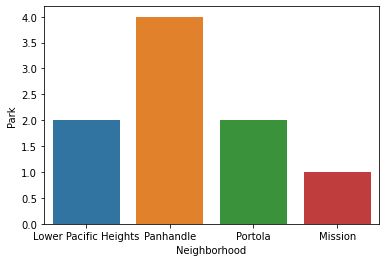

In [44]:

ax = sns.barplot(x= "Neighborhood", y = 'Park', data =sf_c2ap )